In [2]:
print('Diego Parra')

Diego Parra


## Customer Churn Prediction

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Diego Parra

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Problem Statement
* This project predicts customer churn to improve customer retention strategies for businesses.
    
    
    
* **Keywords:** customer churn, customer retention, predictive analytics 
	

### Required packages

* Add instructions to install the required packages


In [6]:
## Your code begins here
!pip install pandas numpy matplotlib seaborn scikit-learn

### Methodology

1. Explan your big data metodology
 * We follow a standard data science workflow: data cleaning, exploratory data analysis (EDA), feature engineering, and machine learning modeling.
 * Categorical variables (Geography, Gender) will be encoded.
 * Irrelevant columns (RowNumber, CustomerId, Surname) will be dropped.


2. Introduce the topics you used in your project
 * Model 1
    * K-Nearest Neighbors Classification (KNN)
 
 * Model 2
    * Logistic Regression
 

### Your code starts here

In [11]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# 2. Load the Data
# Replace 'Churn_Modelling.csv' with the actual path if needed
df = pd.read_csv('Churn_Modelling.csv')

# Display first 5 rows to check data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# 3. Data Cleaning & Preprocessing

# Drop columns that do not contribute to prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns (Geography and Gender)
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Display data types and summary
print(df.info())

Missing values in each column:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2)

In [17]:
# 4. Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

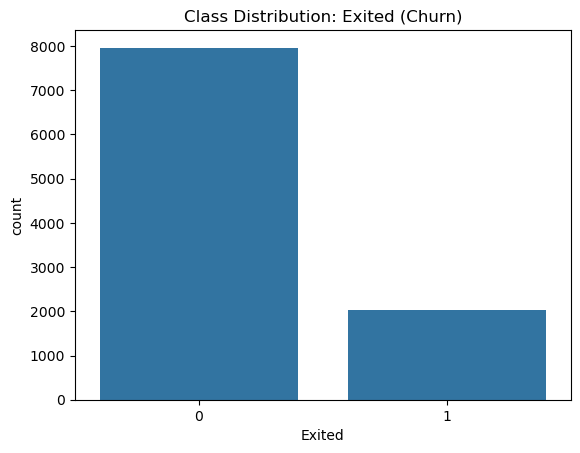

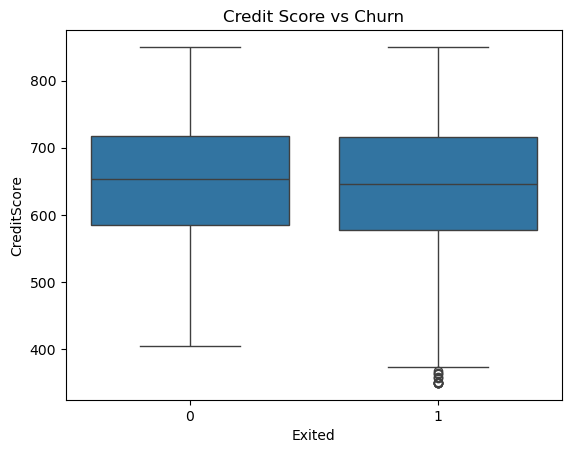

In [19]:
# 5. Exploratory Data Analysis (EDA)
# Example: Plot class balance
sns.countplot(x='Exited', data=df)
plt.title('Class Distribution: Exited (Churn)')
plt.show()

# Example: Visualize distribution of CreditScore by churn
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score vs Churn')
plt.show()

In [21]:
# 6. Model 1: K-Nearest Neighbors (KNN)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.835
KNN Confusion Matrix:
 [[1519   88]
 [ 242  151]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000



In [23]:
# 7. Model 2: Logistic Regression

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8155
Logistic Regression Confusion Matrix:
 [[1559   48]
 [ 321   72]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



### Conclusions


In [25]:
conclusion = """
Both KNN and Logistic Regression models provided useful insights into customer churn prediction.
Logistic Regression had slightly higher accuracy and interpretability.
Key predictors included CreditScore, Geography, and IsActiveMember.
These findings can help the bank develop targeted retention strategies.
"""
print(conclusion)


Both KNN and Logistic Regression models provided useful insights into customer churn prediction.
Logistic Regression had slightly higher accuracy and interpretability.
Key predictors included CreditScore, Geography, and IsActiveMember.
These findings can help the bank develop targeted retention strategies.



###  References
   - Academic (if any)
   - Online (if any)
	

In [27]:
references = """
- Kaggle Churn Modelling Data: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers
- scikit-learn documentation: https://scikit-learn.org/
"""
print(references)


- Kaggle Churn Modelling Data: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers
- scikit-learn documentation: https://scikit-learn.org/



### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [29]:
credits = """
This code is based on public scikit-learn documentation and various online data science tutorials.
"""
print(credits)


This code is based on public scikit-learn documentation and various online data science tutorials.



In [31]:
# End of Project